# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age
* Fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('titanic_passengers.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: title={'center': 'Survival by Sex on the Titanic'}, xlabel='Survived (0=death,1=lived)', ylabel='Number of Passangers'>

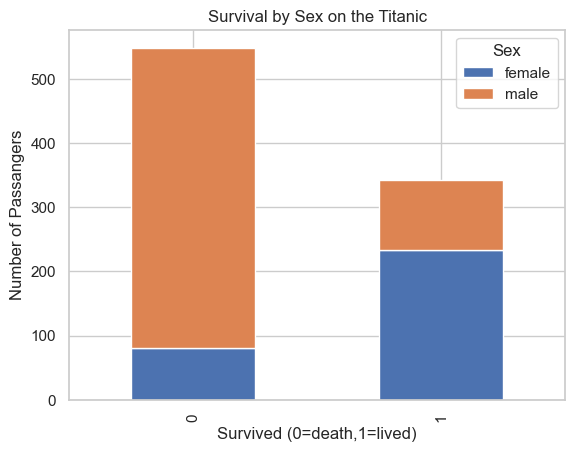

In [82]:
pd.crosstab(df['Survived'], df['Sex']).plot(kind='bar', title='Survival by Sex on the Titanic', ylabel='Number of Passangers', xlabel='Survived (0=death,1=lived)', stacked=True)

In [83]:
df.loc[df['Parch'] == 0, 'Parch_cat'] = 0
df.loc[df['Parch'] > 0, 'Parch_cat'] = 1

pd.crosstab(df['Parch'], df['Parch_cat'])

Parch_cat,0.0,1.0
Parch,,
0,678,0
1,0,118
2,0,80
3,0,5
4,0,4
5,0,5
6,0,1


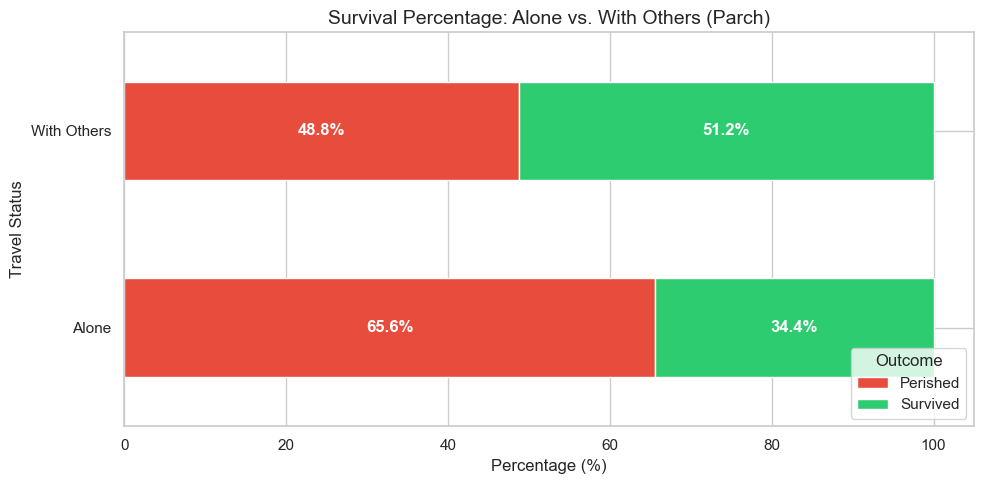

In [84]:
# 1. Create a new column to distinguish "Alone" from "With Others"
# If Parch is 0, they are "Alone". If Parch is 1 or more, they are "With Others".
df['Travel_Status'] = np.where(df['Parch'] == 0, 'Alone', 'With Others')

# 2. Create the crosstab using the new column
ct = pd.crosstab(df['Travel_Status'], df['Survived'], normalize='index') * 100

# 3. Plot as a horizontal stacked bar chart
ax = ct.plot(kind='barh', 
             stacked=True, 
             figsize=(10, 5), 
             color=['#e74c3c', '#2ecc71'])

# 4. Formatting
plt.title('Survival Percentage: Alone vs. With Others (Parch)', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Travel Status')
plt.legend(title='Outcome', labels=['Perished', 'Survived'], loc='lower right')

# Add percentage text labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (p.get_x() + width / 2, p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [85]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [86]:
# Create a new column 'Fare_Category' with a default value
df['Fare_Category'] = 'Low'

# Use .loc to categorize based on the describe() quartiles
# 0 - 7.91 (Bottom 25%)
df.loc[df['Fare'] <= 7.91, 'Fare_Category'] = 'Low'

# 7.91 - 14.45 (25% to 50%)
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.45), 'Fare_Category'] = 'Mid-Low'

# 14.45 - 31.0 (50% to 75%)
df.loc[(df['Fare'] > 14.45) & (df['Fare'] <= 31.0), 'Fare_Category'] = 'Mid-High'

# > 31.0 (Top 25%)
df.loc[df['Fare'] > 31.0, 'Fare_Category'] = 'High'

# Group by Sex and Fare_Category, then calculate the mean of 'Survived'
survival_rates = df.groupby(['Sex', 'Fare_Category'])['Survived'].mean() * 100

print(survival_rates, '\n')

# Group by Sex, Fare_Category, and Survived status, then count the names
survival_counts = df.groupby(['Sex', 'Fare_Category', 'Survived'])['Name'].count()

print(survival_counts)

Sex     Fare_Category
female  High             85.585586
        Low              69.767442
        Mid-High         67.346939
        Mid-Low          67.741935
male    High             30.630631
        Low               7.777778
        Mid-High         27.480916
        Mid-Low          16.129032
Name: Survived, dtype: float64 

Sex     Fare_Category  Survived
female  High           0            16
                       1            95
        Low            0            13
                       1            30
        Mid-High       0            32
                       1            66
        Mid-Low        0            20
                       1            42
male    High           0            77
                       1            34
        Low            0           166
                       1            14
        Mid-High       0            95
                       1            36
        Mid-Low        0           130
                       1            25
Name: Nam

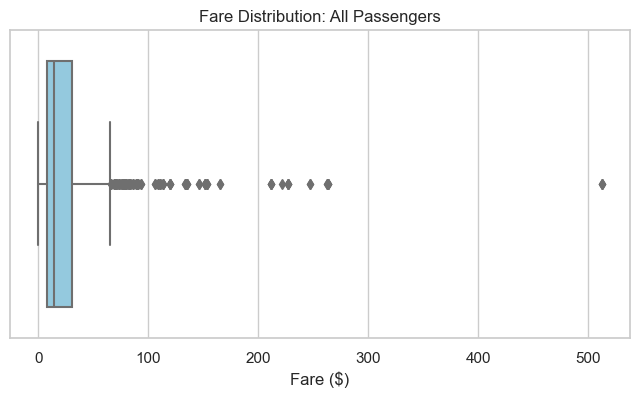

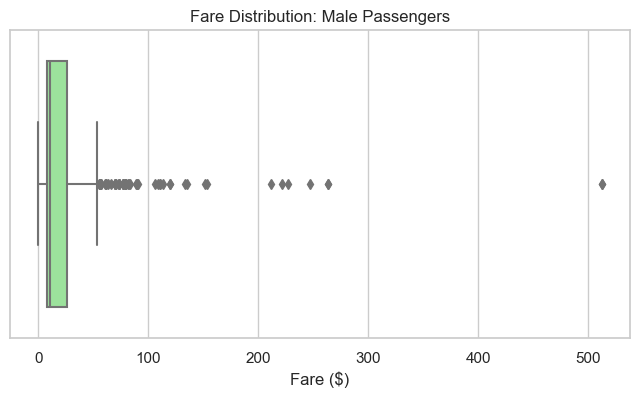

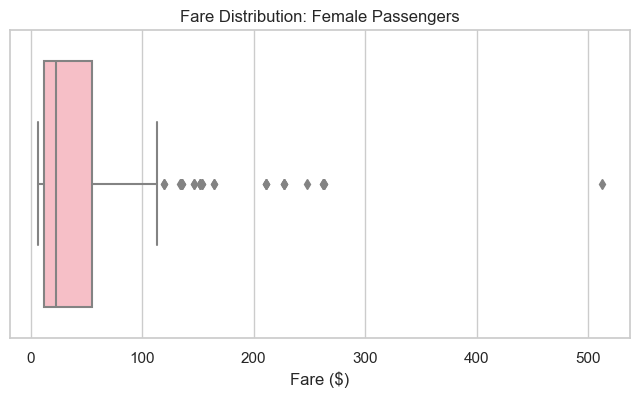

In [87]:
# Set a nice style for the plots
sns.set(style="whitegrid")

# --- PLOT 1: Fare Distribution (All Passengers) ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'], color='skyblue')
plt.title('Fare Distribution: All Passengers')
plt.xlabel('Fare ($)')
plt.show()

# --- PLOT 2: Fare Distribution (Male Passengers Only) ---
plt.figure(figsize=(8, 4))
# Filter data for Males
male_fares = df.loc[df['Sex'] == 'male', 'Fare']
sns.boxplot(x=male_fares, color='lightgreen')
plt.title('Fare Distribution: Male Passengers')
plt.xlabel('Fare ($)')
plt.show()

# --- PLOT 3: Fare Distribution (Female Passengers Only) ---
plt.figure(figsize=(8, 4))
# Filter data for Females
female_fares = df.loc[df['Sex'] == 'female', 'Fare']
sns.boxplot(x=female_fares, color='lightpink')
plt.title('Fare Distribution: Female Passengers')
plt.xlabel('Fare ($)')
plt.show()

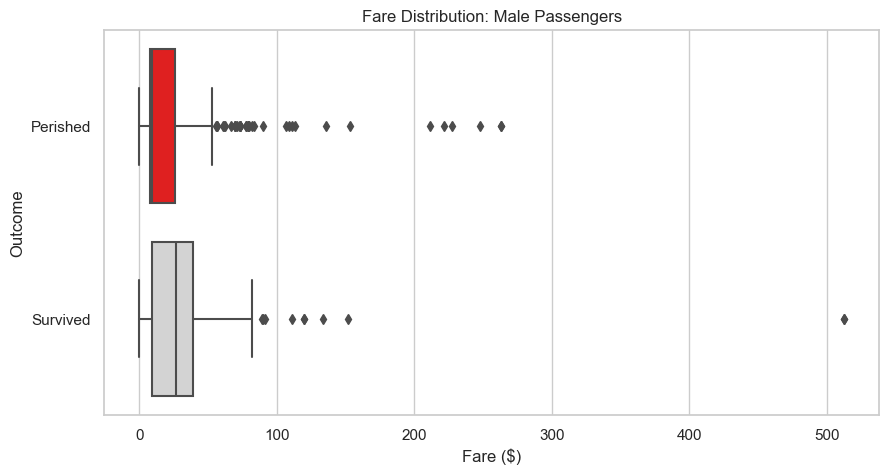

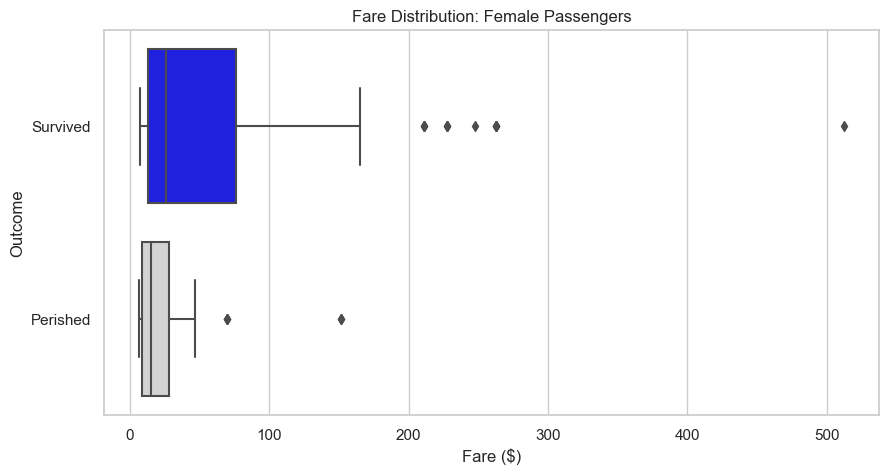

In [88]:
sns.set(style="whitegrid")

# Create a Label column for clearer plots (0 -> Perished, 1 -> Survived)
df['Survival_Status'] = df['Survived'].map({0: 'Perished', 1: 'Survived'})

# --- PLOT 1: Male Passengers (Horizontal) ---
plt.figure(figsize=(10, 5))
male_data = df[df['Sex'] == 'male']

# Colors: Perished = Red, Survived = Neutral
male_palette = {'Perished': 'red', 'Survived': '#d3d3d3'}

# Note: x is now Fare, y is Survival_Status
sns.boxplot(x='Fare', y='Survival_Status', data=male_data, palette=male_palette)
plt.title('Fare Distribution: Male Passengers')
plt.xlabel('Fare ($)')
plt.ylabel('Outcome')
plt.show()

# --- PLOT 2: Female Passengers (Horizontal) ---
plt.figure(figsize=(10, 5))
female_data = df[df['Sex'] == 'female']

# Colors: Perished = Neutral, Survived = Blue
female_palette = {'Perished': '#d3d3d3', 'Survived': 'blue'}

# Note: x is now Fare, y is Survival_Status
sns.boxplot(x='Fare', y='Survival_Status', data=female_data, palette=female_palette)
plt.title('Fare Distribution: Female Passengers')
plt.xlabel('Fare ($)')
plt.ylabel('Outcome')
plt.show()

In [89]:
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [90]:
pd.crosstab([df['Sex'], df['Pclass']], df['Survived'])

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [91]:
pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], normalize='index') * 100

Survived               0          1
Sex    Pclass                      
female 1        3.191489  96.808511
       2        7.894737  92.105263
       3       50.000000  50.000000
male   1       63.114754  36.885246
       2       84.259259  15.740741
       3       86.455331  13.544669

In [92]:
# Define your bin edges and labels
bins = [0, 12, 17, 50, 200]
labels = ['Child', 'Teen', 'Adult', 'Senior']

# Create a new column 'Age_Group'
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 2. Group by Sex and Age_Group to see Survival Counts
survival_age_group = pd.crosstab([df['Sex'], df['Age_Group']], df['Survived'])
print("Survival Counts by Sex and Age Group:")
print(survival_age_group)
print("\n")

# 3. See Survival Percentages
survival_age_pct = pd.crosstab([df['Sex'], df['Age_Group']], df['Survived'], normalize='index') * 100
print("Survival Percentages by Sex and Age Group:")
print(survival_age_pct)

Survival Counts by Sex and Age Group:
Survived            0    1
Sex    Age_Group          
female Child       13   19
       Teen         4   19
       Adult       46  143
       Senior       1   16
male   Child       16   21
       Teen        19    2
       Adult      284   64
       Senior      41    6


Survival Percentages by Sex and Age Group:
Survived                  0          1
Sex    Age_Group                      
female Child      40.625000  59.375000
       Teen       17.391304  82.608696
       Adult      24.338624  75.661376
       Senior      5.882353  94.117647
male   Child      43.243243  56.756757
       Teen       90.476190   9.523810
       Adult      81.609195  18.390805
       Senior     87.234043  12.765957


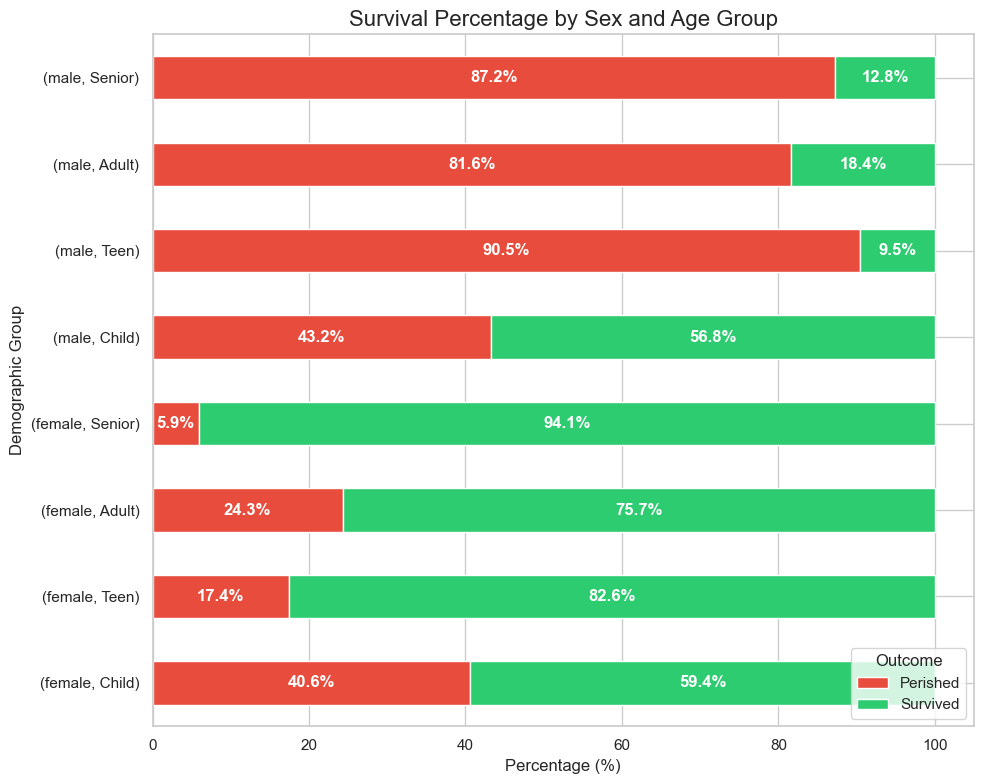

In [93]:
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 2. Create the crosstab: Group by Sex and Age_Group
# normalize='index' converts counts to percentages for each row
ct = pd.crosstab([df['Sex'], df['Age_Group']], df['Survived'], normalize='index') * 100

# 3. Plot as a horizontal stacked bar chart
# We use figsize=(10, 8) to ensure the 8 bars (2 sexes * 4 age groups) fit comfortably
ax = ct.plot(kind='barh', 
             stacked=True, 
             figsize=(10, 8), 
             color=['#e74c3c', '#2ecc71']) # Red for Perished, Green for Survived

# 4. Formatting
plt.title('Survival Percentage by Sex and Age Group', fontsize=16)
plt.xlabel('Percentage (%)')
plt.ylabel('Demographic Group')
plt.legend(title='Outcome', labels=['Perished', 'Survived'], loc='lower right')

# Add percentage text labels to the center of each bar segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (x + width / 2, y + height / 2), 
                    ha='center', va='center', 
                    color='white', fontweight='bold')

plt.tight_layout()
plt.show()


In [94]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [95]:
pd.crosstab([df['Sex'], df['Embarked']], df['Survived'])

Survived           0    1
Sex    Embarked          
female C           9   64
       Q           9   27
       S          63  140
male   C          66   29
       Q          38    3
       S         364   77

In [96]:
pd.crosstab([df['Sex'], df['Embarked']], df['Survived'], normalize='index') * 100

Survived                 0          1
Sex    Embarked                      
female C         12.328767  87.671233
       Q         25.000000  75.000000
       S         31.034483  68.965517
male   C         69.473684  30.526316
       Q         92.682927   7.317073
       S         82.539683  17.460317

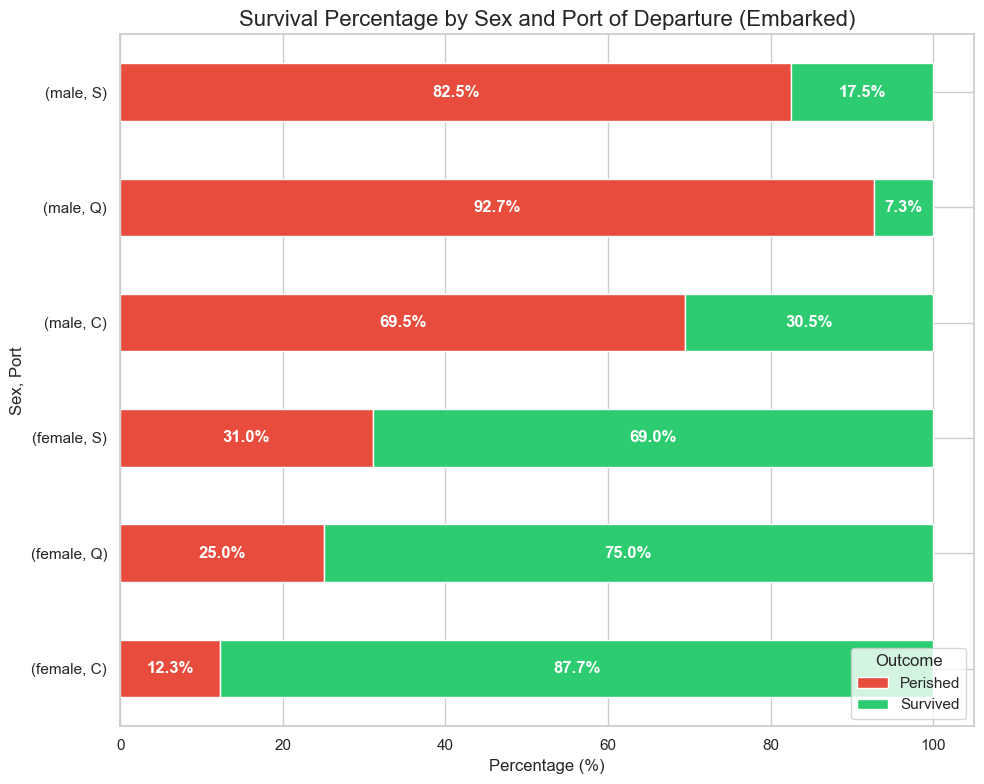

In [97]:
ct = pd.crosstab([df['Sex'], df['Embarked']], df['Survived'], normalize='index') * 100

# 3. Plot as a horizontal stacked bar chart
# We use figsize=(10, 8) to ensure the 8 bars (2 sexes * 4 age groups) fit comfortably
ax = ct.plot(kind='barh', 
             stacked=True, 
             figsize=(10, 8), 
             color=['#e74c3c', '#2ecc71']) # Red for Perished, Green for Survived

# 4. Formatting
plt.title('Survival Percentage by Sex and Port of Departure (Embarked)', fontsize=16)
plt.xlabel('Percentage (%)')
plt.ylabel('Sex, Port')
plt.legend(title='Outcome', labels=['Perished', 'Survived'], loc='lower right')

# Add percentage text labels to the center of each bar segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (x + width / 2, y + height / 2), 
                    ha='center', va='center', 
                    color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Most likely to Survive:

* Age:		Senior
* Fare:		High
* Sex:		Female
* Pass class:	1
* Travel comp:	With Others
* PoD:		Cherbourg

# Most likely to Parish:

* Age:		Teen
* Fare:		Low
* Sex:		Male
* Pass class:	3
* Travel comp:	Alone
* PoD:		Queenstown


# Note on Port Codes:

* C = Cherbourg
* Q = Queenstown
* S = Southampton

# Note on Age Groups:

* Child	<= 	12
* Teen	<=	17
* Adult <= 	50
* Senior > 	50


In [98]:
# --- Step 1: Feature Engineering (Re-creating your groups) ---

# Fare Categories (based on your quartiles: 0-7.91, 7.91-14.45, 14.45-31.0, >31.0)
df['Fare_Category'] = pd.cut(df['Fare'], 
                             bins=[-1, 7.91, 14.45, 31.0, 1000], 
                             labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Age Groups (Child <= 12, Teen <= 17, Adult <= 50, Senior > 50)
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 12, 17, 50, 200], 
                         labels=['Child', 'Teen', 'Adult', 'Senior'])

# Travel Status (Alone if Parch == 0, else With Others)
df['Travel_Status'] = np.where(df['Parch'] == 0, 'Alone', 'With Others')

# --- Step 2: Create the Filters ---

# Filter 1: Most Likely to Survive (Senior, High Fare, Female, Class 1, With Others, Cherbourg)
# Note: 'C' = Cherbourg
filter_ml_survive = (
    (df['Age_Group'] == 'Senior') & 
    (df['Fare_Category'] == 'High') & 
    (df['Sex'] == 'female') & 
    (df['Pclass'] == 1) & 
    (df['Travel_Status'] == 'With Others') & 
    (df['Embarked'] == 'C')
)

# Filter 2: Most Likely to Perish (Teen, Low Fare, Male, Class 3, Alone, Queenstown)
# Note: 'Q' = Queenstown
filter_ml_perish = (
    (df['Age_Group'] == 'Teen') & 
    (df['Fare_Category'] == 'Low') & 
    (df['Sex'] == 'male') & 
    (df['Pclass'] == 3) & 
    (df['Travel_Status'] == 'Alone') & 
    (df['Embarked'] == 'Q')
)

# --- Step 3: Identify Passengers ---

print("--- Passengers Most Likely to Survive ---")
ml_survive_passengers = df[filter_ml_survive]
if not ml_survive_passengers.empty:
    print(ml_survive_passengers[['Name', 'Age', 'Fare', 'Survived']])
else:
    print("No passengers found exactly matching all MLSurvive criteria.")

print("\n--- Passengers Most Likely to Perish ---")
ml_perish_passengers = df[filter_ml_perish]
if not ml_perish_passengers.empty:
    print(ml_perish_passengers[['Name', 'Age', 'Fare', 'Survived']])
else:
    print("No passengers found exactly matching all MLPerish criteria.")

--- Passengers Most Likely to Survive ---
                                              Name   Age     Fare  Survived
879  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0  83.1583         1

--- Passengers Most Likely to Perish ---
No passengers found exactly matching all MLPerish criteria.


# Most likely to Survive: Lily Alexenia Wilson (Mrs. Potter)

* Age:		56
* Fare:		83
* Sex:		Female
* Pass class:	1
* Travel comp:	1 (as a +1 with Thomas Jr Potter)
* PoD:		Cherbourg

# Most likely to Parish: None Found

For sake of assignment expanding search paramaters till finding a MLP. I will be keeping the search to a lone-male, with low fare and Pclass, that departed from Queenstown. Age makes the most logical to expand the ranges for that would be least significant to impant the findings of the data. Restarting all the analysis grouping age to Young Adult (<= 20) and Adult (<=50) would be the correct procedure, but for assignment sake I will only be changing the search criteria not the analysis criteria.

In [99]:
# Age Groups (Child <= 12, Young Adult <= 20, Adult <= 50, Senior > 50)
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 12, 20, 50, 200], 
                         labels=['Child', 'Young Adult', 'Adult', 'Senior'])
                         
filter_ml_perish = (
    (df['Age_Group'] == 'Young Adult') & 
    (df['Fare_Category'] == 'Low') & 
    (df['Sex'] == 'male') & 
    (df['Pclass'] == 3) & 
    (df['Travel_Status'] == 'Alone') & 
    (df['Embarked'] == 'Q')
)

print("\n--- Passengers Most Likely to Perish ---")
ml_perish_passengers = df[filter_ml_perish]
if not ml_perish_passengers.empty:
    print(ml_perish_passengers[['Name', 'Age', 'Fare', 'Survived']])
else:
    print("No passengers found exactly matching all MLPerish criteria.")


--- Passengers Most Likely to Perish ---
                    Name   Age  Fare  Survived
143  Burke, Mr. Jeremiah  19.0  6.75         0


# Most likely to Survive: Lily Alexenia Wilson (Mrs. Potter)

* Age:		56
* Fare:		83
* Sex:		Female
* Pass class:	1
* Travel comp:	1 (presumably with her husband)
* PoD:		Cherbourg

# Most likely to Parish: Burke, Mr. Jeremiah

* Age:		19
* Fare:		6.75
* Sex:		Male
* Pass class:	3
* Travel comp:	Alone
* PoD:		Queenstown

# Lily Alexenia Potter (most likely to survive)
Mrs. Potter was a widow. Her Husband, Col. Thomas Potter Jr., passed in 1910 and she went on a European vacation the next year with her daughter, Olive Earnshaw, and Miss Margaret Hays. - https://www.encyclopedia-titanica.org/titanic-survivor/lily-alexenia-potter.html
Just goes to show how wrong assumptions can be, and how little power even wealthy woman had.

# Jeremiah Burke (least likely to surivive)

Mr. Burke's final words in this world were not spoken, but pen'd into a note and stuffed into a bottle. 13 Months after the tragity a postman walking his dog found a bottle on a beach near Cork Harbour with a note which read, 
"13/4/1912 [sic]
from Titanic,
Goodbye all
Burke of Glanmire Cork" - https://www.encyclopedia-titanica.org/titanic-victim/jeremiah-burke.html

In [100]:
search_results = df[df['Name'].str.contains('Olive|Hays|Earnshaw|Potter|Boulton', case=False, na=False)]

# Display the results
print(search_results[['Name', 'Age', 'Fare', 'Pclass']])

                                                  Name   Age     Fare  Pclass
310                     Hays, Miss. Margaret Bechstein  24.0  83.1583       1
775            Myhrman, Mr. Pehr Fabian Oliver Malkolm  18.0   7.7500       3
820  Hays, Mrs. Charles Melville (Clara Jennings Gr...  52.0  93.5000       1
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0  83.1583       1


Lily's daughter, Olive is not listed in this dataset either